In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape
print("There are %d rows" %(df.shape[0]) + " and %d columns in the car dataset" %(df.shape[1]))

There are 301 rows and 9 columns in the car dataset


In [5]:
print("There are %d rows and %d columns in the car dataset"  %(df.shape[0],df.shape[1]))

There are 301 rows and 9 columns in the car dataset


In [6]:
#There are some categorical features. So lets print all the unique categories for each of the feature.

print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [7]:
#Check for missing values or null values
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#We can also remove the car name column as its not that important

final_dataset = df.drop(columns=['Car_Name'])
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#Lets create a new column to find how old the car is. We can do that by subtracting from the current year (here its 2020)
#Noe lets add a new column 'Current_Year'

final_dataset['Current_Year'] = 2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [11]:
final_dataset['No_year'] = final_dataset['Current_Year'] - final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
#We can drop Year and Current year columns
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [13]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [14]:
#Now let's convert categorical features using get dummies

final_dataset=pd.get_dummies(final_dataset,drop_first=True) #drop_first is true so the first column is prevented from dummy variable trap

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
#Now let's find the correlation
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


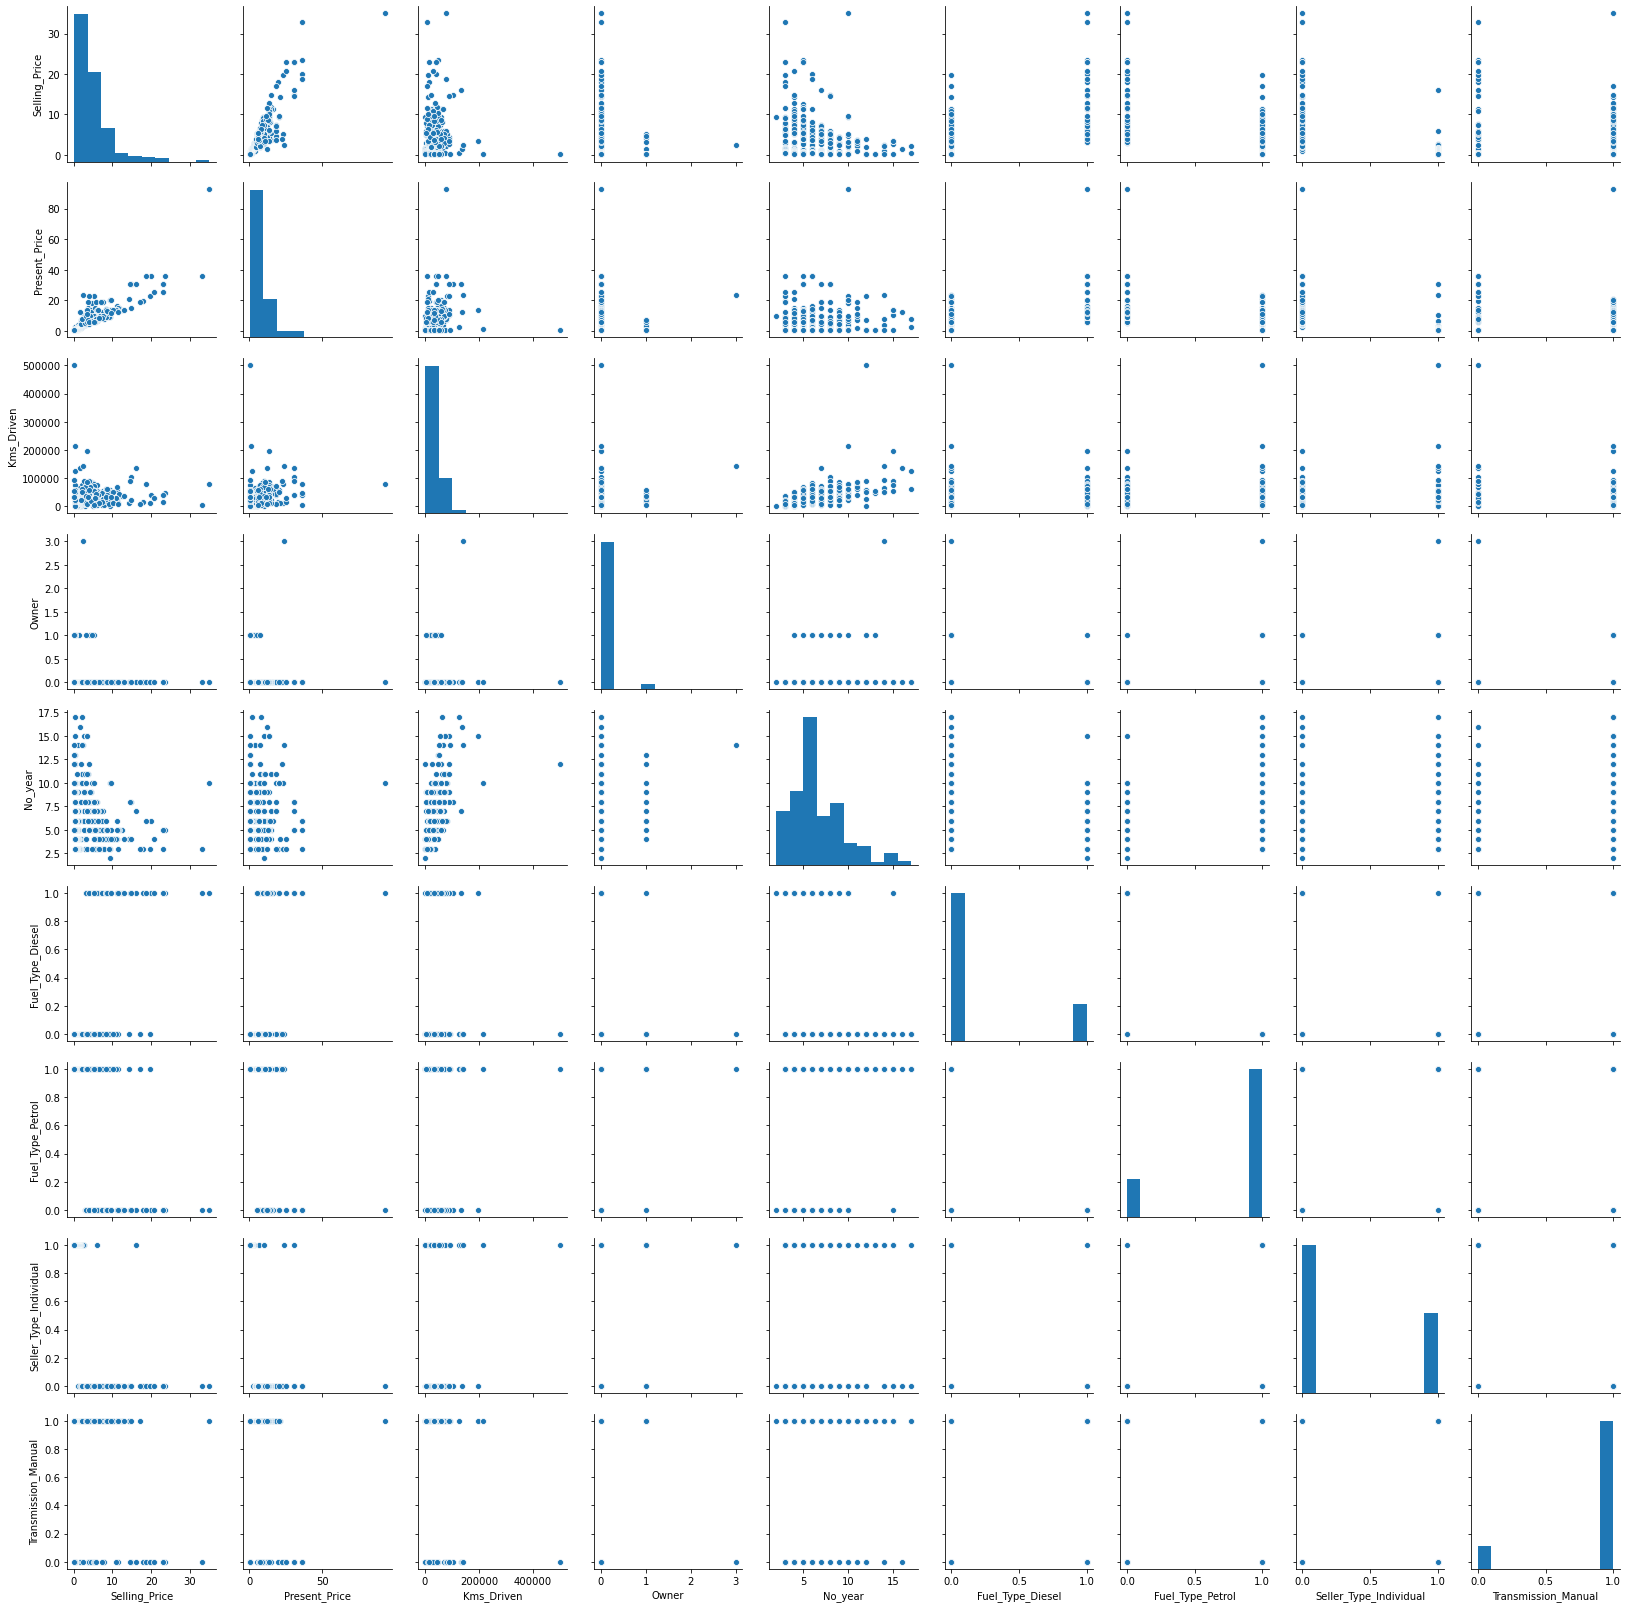

In [18]:
#Lets visualize this correlation
import seaborn as sns
sns.pairplot(final_dataset)

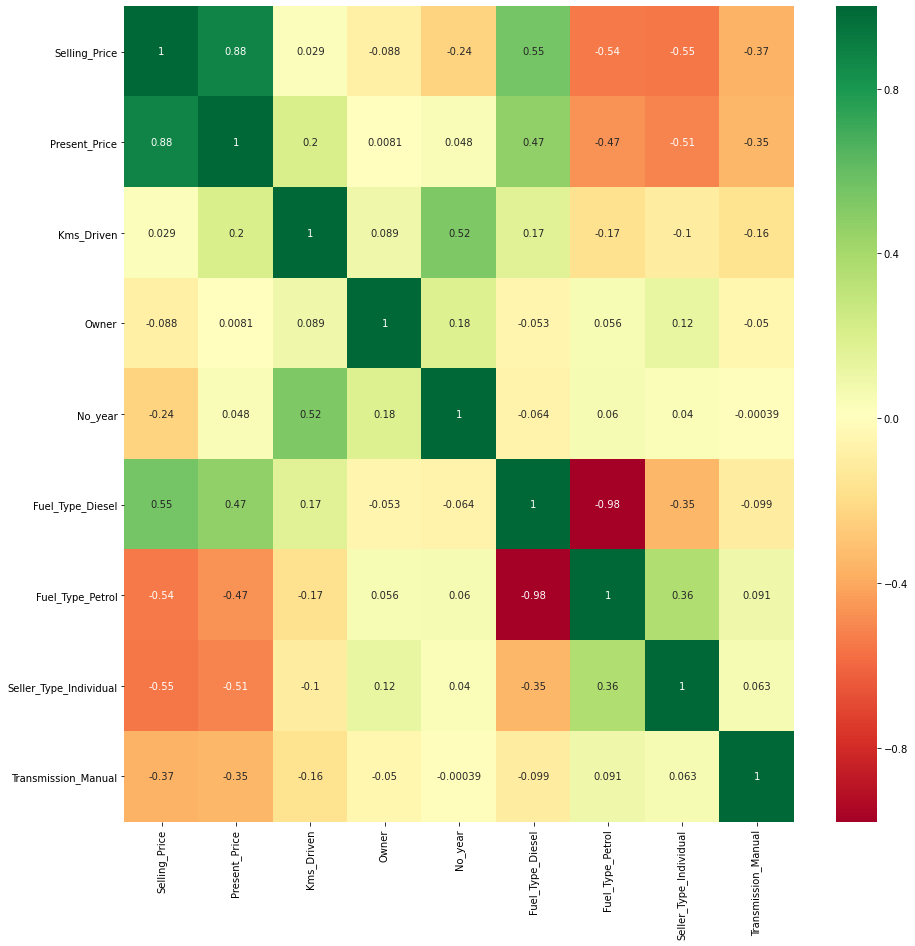

In [24]:
#We can plot a heatmap to get a better picture of the correlation
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#Here darker green says its positively correlated and red colour says they are negatively correlated

#Selling price and present price are positively correlated
#Fuel type diesel and fuel type petrol are negatively correlated

In [25]:
#Now we will set the dependent (target) feature (Selling Price) and independent features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
# Now we will check for the important features and order them as per their importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [29]:
print(model.feature_importances_)

[0.36142991 0.04255568 0.00089374 0.07745269 0.23242433 0.00936177
 0.13250021 0.14338167]


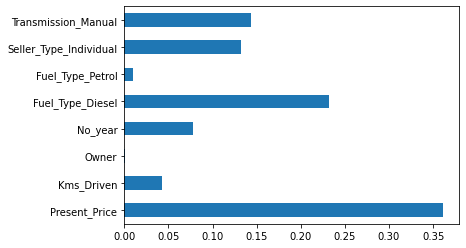

In [31]:
#Plot graph for better visualization of feature importance
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
#feature_imp.nlargest(5).plot(kind='barh') #this just gives the 5 largest features
feature_imp.plot(kind='barh')

plt.show()

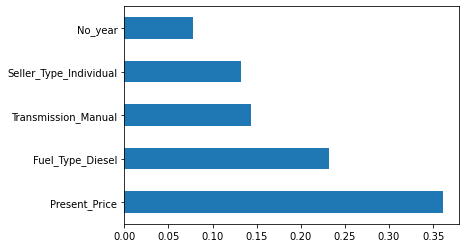

In [32]:
feature_imp.nlargest(5).plot(kind='barh')

In [33]:
#Next we do train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [34]:
X_train.shape

(240, 8)

In [36]:
#Here we will use Random Forest. So scaling is not needed. 

from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [39]:
#We will also do hyperparameter tuning

#Will select different decision tree values between 100 to 1200
import numpy as np 

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)



[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [40]:
from sklearn.model_selection import RandomizedSearchCV
#will use some more parameters
# Performing hyperparameter tuning using Randomized Search CV and this wil give the best parameters to be used

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#Gris search CV can also be used but Randomized search CV is faster

In [41]:
# Create the random grid  All the values has to be given aas key value pairs
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor() #Initialize random regressor

In [43]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [45]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
rf_random.best_score_

-3.9781630353963875

In [53]:
#Now we have created the model and lets do a prediction

predictions = rf_random.predict(X_test)
predictions

array([ 0.33356498,  2.90414137,  0.28585081,  2.82203195,  2.90101839,
        0.26073178, 20.67008492,  8.43610809,  3.91952511,  8.26492275,
        7.68329447,  0.61015361,  4.27683318,  0.61015361,  7.12256216,
        0.60847061,  7.18340853, 22.33578168,  8.0769364 ,  5.08565648,
        0.38173627, 22.11764026,  0.41522987,  1.17389068,  5.18193061,
        0.59204312,  0.41522987,  0.34628538,  0.49222651,  5.38343003,
        9.23775552,  0.53352442,  7.7904527 ,  2.87813585,  7.51187586,
        3.11774154,  4.54828627,  4.08287648,  0.26073178,  1.17355848,
       22.11764026,  4.5522475 ,  0.57409959,  2.7680715 ,  3.39054168,
       10.35580409,  0.60191844,  7.05404515,  6.44962717,  1.06277042,
        0.5399629 ,  0.36436941,  0.51403798,  0.40788176,  5.37809878,
        3.67293266,  7.63924742,  2.72414207,  1.04774462,  0.41573366,
        5.49431902])

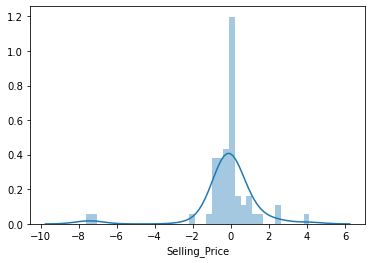

In [48]:
sns.distplot(y_test-predictions)

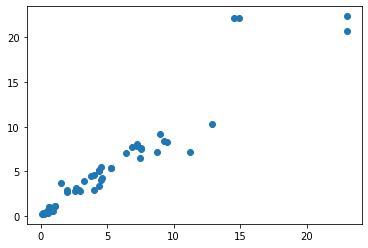

In [49]:
plt.scatter(y_test,predictions)

In [51]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7768888329425804
MSE: 2.6294800608790547
RMSE: 1.6215671620007155


In [52]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
#Next step is to create requirements.txt. This we will do from the car prediction environment, go to the respective folder and pip freeze reuirements.txt
#These are all needed for deployment
#use   pip freeze -r requirements.txt


